<a href="https://colab.research.google.com/github/conrrado/MLStudies/blob/main/AluraMLProject4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [2]:
data["km_por_ano"] = data["milhas_por_ano"] * 1.60934
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [3]:
from datetime import datetime

data["idade"] = datetime.now().year - data["ano_do_modelo"]
data.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,24
1,7843,1998,40557.96,1,12622.05362,26
2,7109,2006,89627.50,0,11440.79806,18
3,26823,2015,95276.14,0,43167.32682,9
4,7935,2014,117384.68,1,12770.11290,10


In [4]:
data.drop(columns=["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
data.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,24
1,40557.96,1,12622.05362,26
2,89627.50,0,11440.79806,18
3,95276.14,0,43167.32682,9
4,117384.68,1,12770.11290,10


In [5]:
x = data[["preco", "idade", "km_por_ano"]]
y = data["vendido"]

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 20

# random_state -> ensure that the division of data always the same when run this
#   code again
# stratify -> ensure the same proportion in training and testing
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(
    x, y, random_state=SEED, stratify=y)

print(f"Let's train with {len(raw_x_train)} itens")
print(f"Let's test with {len(raw_x_test)} itens")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC(gamma='auto')
model.fit(x_train, raw_y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(raw_y_test, predictions) * 100
print(f"Accuracy rate: {accuracy:.2f}%")

Let's train with 7500 itens
Let's test with 2500 itens
Accuracy rate: 75.92%


In [6]:
len(data.query("vendido == True")) / len(data) * 100

57.99999999999999

In [7]:
from sklearn.dummy import DummyClassifier

# DummyClassifier

classifier = DummyClassifier()
classifier.fit(raw_x_train, raw_y_train)
predictions = classifier.predict(raw_x_test)

accuracy = accuracy_score(raw_y_test, predictions) * 100
print(f"Accuracy rate: {accuracy:.2f}%")

Accuracy rate: 58.00%


DummyClassifier with strategy

In [8]:
# DummyClassifier

classifier = DummyClassifier(strategy='stratified')
classifier.fit(raw_x_train, raw_y_train)
predictions = classifier.predict(raw_x_test)

accuracy = accuracy_score(raw_y_test, predictions) * 100
print(f"Accuracy rate: {accuracy:.2f}%")

Accuracy rate: 48.20%


sklearn with DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 20

# random_state -> ensure that the division of data always the same when run this
#   code again
# stratify -> ensure the same proportion in training and testing
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(
    x, y, random_state=SEED, stratify=y)

print(f"Let's train with {len(raw_x_train)} itens")
print(f"Let's test with {len(raw_x_test)} itens")

# scaler = StandardScaler()
# scaler.fit(raw_x_train)
# x_train = scaler.transform(raw_x_train)
# x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
# model.fit(x_train, raw_y_train)
# predictions = model.predict(x_test)

model.fit(raw_x_train, raw_y_train)
predictions = model.predict(raw_x_test)

accuracy = accuracy_score(raw_y_test, predictions) * 100
print(f"Accuracy rate: {accuracy:.2f}%")

Let's train with 7500 itens
Let's test with 2500 itens
Accuracy rate: 78.40%


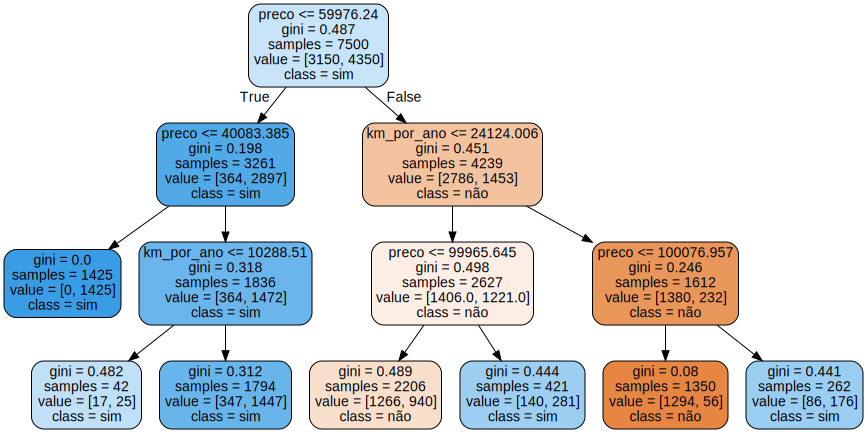

In [15]:
from sklearn.tree import export_graphviz
import graphviz

structure = export_graphviz(model, filled=True, rounded=True,
                            feature_names=x.columns, class_names=["não", "sim"])
graph = graphviz.Source(structure)
graph